## Importing libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image

## Path of the Dataset

In [2]:
base_dir = 'C:\\Users\\hp\\Desktop\\Dataset'

## Loading and resizing of Train data

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load training data
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),  
    target_size=(150, 150),  
    batch_size=32,
    class_mode='binary',  
    classes=['cats', 'dogs']  
)

Found 557 images belonging to 2 classes.


## Loading and resizing of Test data

In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    os.path.join(base_dir, 'test'), 
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary', 
    classes=['cats', 'dogs']  
)

Found 140 images belonging to 2 classes.


## Displaying images from dataset

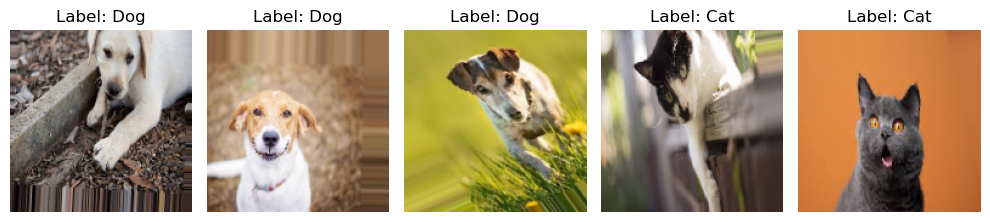

In [5]:
images, labels = next(train_generator)

# Display the first 5 images
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])
    plt.title('Label: ' + ('Dog' if labels[i] == 1 else 'Cat'))
    plt.axis('off')
plt.tight_layout()
plt.show()

## Counting images in train dataset

In [6]:
# Counting the number of images in each class
cat_count = len(os.listdir(os.path.join(base_dir, 'train', 'cats')))
dog_count = len(os.listdir(os.path.join(base_dir, 'train', 'dogs')))
print(f"Number of Cat images: {cat_count}")
print(f"Number of Dog images: {dog_count}")

Number of Cat images: 279
Number of Dog images: 278


## Counting images in test dataset

In [7]:

# Count the number of images in each class
cat_count = len(os.listdir(os.path.join(base_dir, 'test', 'cats')))
dog_count = len(os.listdir(os.path.join(base_dir, 'test', 'dogs')))
print(f"Number of Cat images: {cat_count}")
print(f"Number of Dog images: {dog_count}")


Number of Cat images: 70
Number of Dog images: 70


### As we can see from the above outputs, there are total 697 images. Consisting of 349 cat images and 348 dog images. So the dataset is balanced.

## Building a CNN model

In [8]:
# Step 4: Build the CNN Model
model = models.Sequential()

In [9]:
# CNN Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# CNN Layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# CNN Layer 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flattening of the Layer
model.add(layers.Flatten())

# Fully Connected Layer
model.add(layers.Dense(512, activation='relu'))

# Output Layer
model.add(layers.Dense(1, activation='sigmoid')) 

C:\ProgramData\Anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


# Compiling the model

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## Model Training

In [11]:
# Step 6: Train the Model
history = model.fit(train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

Epoch 1/10


C:\ProgramData\Anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.4841 - loss: 1.6963 - val_accuracy: 0.4922 - val_loss: 0.6933
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5000 - loss: 0.3698 - val_accuracy: 0.5833 - val_loss: 0.3417


C:\ProgramData\Anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.5595 - loss: 0.6909 - val_accuracy: 0.5469 - val_loss: 0.6928
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5385 - loss: 0.3529 - val_accuracy: 0.4167 - val_loss: 0.3556
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.5317 - loss: 0.6778 - val_accuracy: 0.5547 - val_loss: 0.6918
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6250 - loss: 0.3579 - val_accuracy: 0.5000 - val_loss: 0.3504
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.6185 - loss: 0.6775 - val_accuracy: 0.5625 - val_loss: 0.6954
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6250 - loss: 0.3447 - val_accuracy: 0.5000 - val_loss: 0.3508
Epoch 9/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.5958 - loss: 0.6797 - val_accuracy: 0.5156 - val_loss: 0.6892
Epoch 10/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5938 - loss: 0.3742 - val_accuracy: 0.4167 - val_loss

## Plotting Accuracy

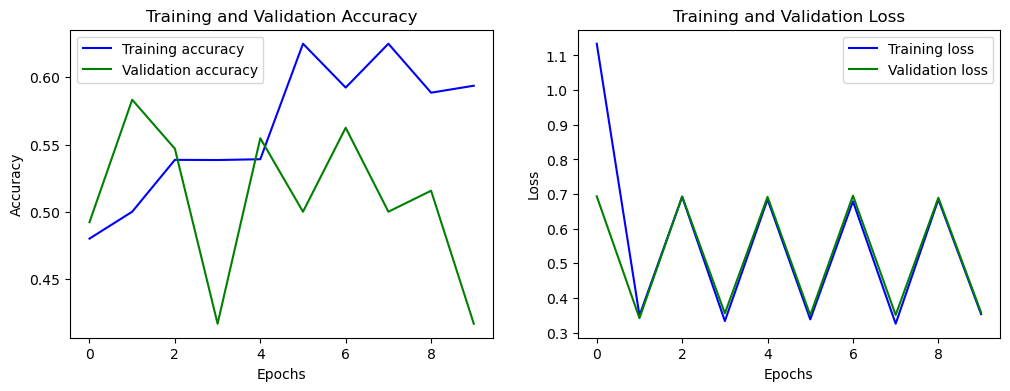

In [12]:
# Step 7: Evaluate the Model
# Plotting accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [13]:
# loading and resizing image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(150, 150))  # Resize to match model input size
    img_array = image.img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize to [0, 1]
    return img_array

#  Make Predictions
def predict_image(model, img_path):
    img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    return prediction

# Display the Result
def display_prediction(img_path, prediction):
    plt.imshow(image.load_img(img_path, target_size=(150, 150)))  # Load the original image
    plt.axis('off')  # Hide axes

    label = 'Dog' if prediction[0] > 0.5 else 'Cat'
    plt.title(f'Predicted: {label} (Confidence: {prediction[0][0]:.2f})')
    plt.show()

### Taking a sample image and predicting whether it is dog or a cat.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step


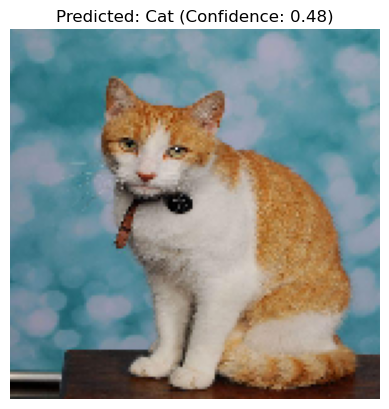

In [14]:
img_path = 'C:\\Users\\hp\\Desktop\\Dataset\\test\\cats\\cat_1.jpg' 

prediction = predict_image(model, img_path)
display_prediction(img_path, prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


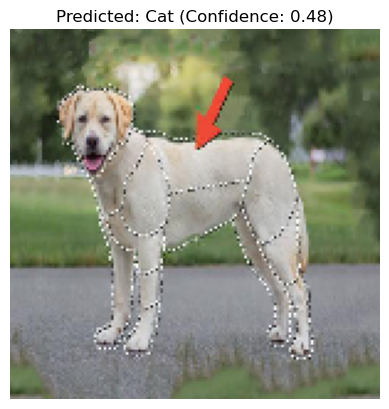

In [15]:
img_path = 'C:\\Users\\hp\\Desktop\\Dataset\\test\\dogs\\dog_59.jpg'

prediction = predict_image(model, img_path)
display_prediction(img_path, prediction)

In [16]:
# Step 1: Evaluate the Model on the Testing Set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 729ms/step - accuracy: 0.4906 - loss: 0.6950
Test Loss: 0.6912
Test Accuracy: 0.5000


### To improve the model performance, Consider increasing  dataset size, addressing class imbalance,experimenting with more complex architectures and evaluating additional performances like precision and recall